# TV Sales Prediction

# Introduction
Predictive analytics is a sub-field within statistics that aims to predict future events with reasonable accuracy by using data obtained from events in the past. A well-known and widely used model in predictive analytics is a regression model. Regression models use input data together with a well-defined function to produce an estimate value. Depending on the scenario, one might decide to use simple linear regression which is a regression technique used when dealing with a single input variable.

Simple linear regression aims to determine a linear relationship between two variables, namely the independent input variable, $x$, and the dependent output variable, $y$, commonly referred to as an estimate. If we have data consisting of two-dimensional sample points for a total of $n$ pairs, that is, our dataset looks like $\{(x_{i}, y_{i}) | i = 1, 2, ..., n\}$ then we can construct a linear model given by

$y_{i}=\omega x_{i} + \beta + \epsilon_{i}$

where $\epsilon_{i}$ is the error term, $\omega$ is the weight (also called slope) parameter and $\beta$ is the bias parameter. The aim of simple linear regression is then to find "good" estimates $\widehat\omega$, $\widehat\beta$ for $\omega$ and $\beta$ respectively in order to find a best fit through the data points. There are many different optimisation algorithms which can be used to find $\omega$ and $\beta$, including the method of least-squares and gradient descent.

The method of least-squares, as the name suggests, aims to minimize the sum of the squared residual terms given by $\widehat\epsilon_{i}$ which can be written as

$\widehat\epsilon_{i} = y_{i} - \omega x_{i} - \beta$

This leaves us with the minimization problem given by $(\widehat\omega, \widehat\beta)=\text{argmin}(Q(\omega,\beta))$ in which $Q(\omega,\beta)$ is called the objective (also called cost or loss) function defined as

$Q(\omega,\beta)=\sum_{i=1}^{n}\widehat\epsilon_{i}^{2}=\sum_{i=1}^{n}(y_{i} - \omega x_{i} - \beta)^{2}$

# Dataset Description
Our task is to predict the sales of a TV brand based on a given budget input, so we want to see whether higher marketing budgets increase tv sales. We start by importing necessary libraries as well as the dataset.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math
import seaborn as sns

from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

In [2]:
data_path = r'data\tvmarketing.csv'
marketing_data = pd.read_csv(data_path)

# Exploring and Cleaning the Dataset
Now that we have imported the necessary libraries as well as the dataset, we will start by exploring the dataset to see if any cleaning needs to be done and to get an idea for the type of data that we are working with as well as the input features.

In [3]:
# Display the first five entries of the dataset
display(marketing_data.head())

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


We see that there are only two columns called TV and Sales. The TV column contains data on the amount of money spent on a marketing campaign to promote TVs and the sales column contains data on the amount of tv sales. In general we might conclude that more expensive advertising campaigns lead to more sales, however in reality you would consider the influence of other factors such as current trends, campaign duration, and other demographics to get a more realistic overview, and by analysing the demographics you could even end up spending less money because you have a better idea of your target audience, which means you don't spend too much by targeting the wrong audience.

We will now check to see if there are any missing values and if the data entries are in the correct format, in this case we expect the entries to be floating point values instead of text based numbers in string format.

In [4]:
# Check data types
display(marketing_data.dtypes)

TV       float64
Sales    float64
dtype: object

In [5]:
# Check for missing values
display(marketing_data.isna().any())

TV       False
Sales    False
dtype: bool

The results above show that there are no missing data points and that the entries are in the correct format. In general there are two ways of handling missing values in a dataset. You could decide to delete rows containing a missing piece of data, however this method can lead to biased results and also a smaller sample. The other method involves replacing the missing piece of data with an estimated value, such as the sample mean.

# Data Visualisation
Now that the data has been cleaned we can start to look at our data by plotting the distribution as well as a scatter plot. We begin by creating a scatter plot.

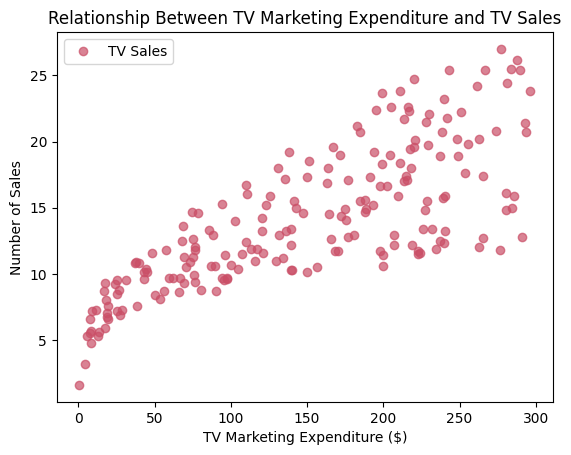

In [6]:
# Define X and Y data
X = marketing_data[['TV']]
Y = marketing_data[['Sales']]

# Create a scatter plot
plt.plot(X, Y, 'o', color='#CA4F67', label = "TV Sales", alpha = 0.7)
plt.title('Relationship Between TV Marketing Expenditure and TV Sales')
plt.xlabel('TV Marketing Expenditure ($)')
plt.ylabel('Number of Sales')
plt.legend()
plt.show()

By looking at the scatter plot above, it is clear that there is a positive relationship between the amount of money spent on a marketing campaign and the total number of sales, however the variation of the total number of sales seems to be relatively large and also increases with marketing expenditure. This could be explained the same way as we did before - a lot of factors determine the success of a marketing campaign and while a larger budget would result in more sales, external demographic factors also have a large impact on sales.

We will now plot a histogram of the data to investigate the distribution.

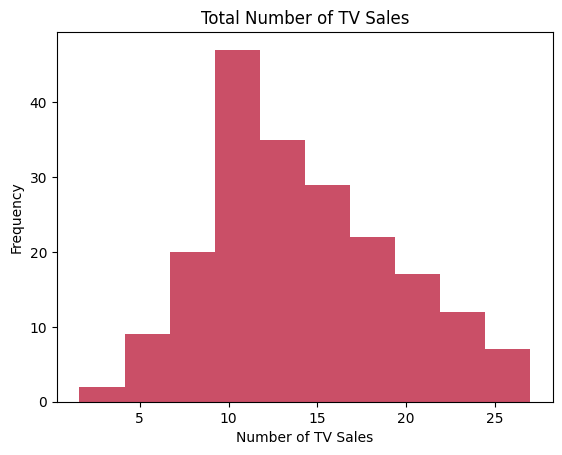

In [14]:
# Plot a histogram
plt.hist(Y, color='#CA4F67')
plt.title('Total Number of TV Sales')
plt.xlabel('Number of TV Sales')
plt.ylabel('Frequency')
plt.show()

We can also create a kernel density estimate plot. 

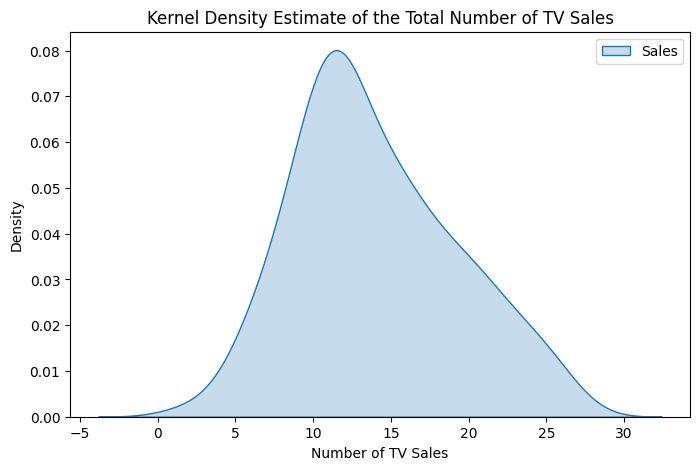

In [27]:
mean_sales = Y.mean()

plt.figure(figsize=(8,5))
sns.kdeplot(Y, fill=True, color='#CA4F67', label='Sales')
#sns.kdeplot(X, fill=True, label='Market Expenditure')
#plt.axvline(mean_sales)
plt.title("Kernel Density Estimate of the Total Number of TV Sales")
plt.xlabel('Number of TV Sales')
plt.ylabel('Density')
plt.legend()
plt.show()

We can see that the sales distribution is slightly skewed to the right. We could also use two metrics called kurtosis is a measure of the distribution height and skew which determines the skewness.

In [41]:
# Calculate kurtosis with the fisher method (can use pearson)
sales_kurtosis = kurtosis(Y, fisher=True)

# calculate the skewness
sales_skew = skew(Y)

display(f"Sales Kurtosis: {sales_kurtosis[0]}")
display(f"Sales Skewness: {sales_skew[0]}")

'Sales Kurtosis: -0.4285695342675746'

'Sales Skewness: 0.4045082487061191'

We see that the kurtosis is less than 3, which means that our distribution is platykurtic, so the tails are shorter with a lower and broader central peak. The skewness is between -0.5 and +0.5 which indicates that the distribution is approximately symmetric.

Next, we can display a statistical summary of the data.

In [34]:
marketing_data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


We see that the mean of the TV column is 147 with a standard deviation of 85.9 and the mean of the Sales column is 14 with a standard deviation of 5.2. Moreover, all of our data fits within 3 standard deviations of the mean, so there does not appear to be any extreme outliers.

# Building the Linear Regression Model
We will now create a linear regression model by splitting our data into training and testing datasets with a 80%/20% ratio between the two. We will feed the training data through the model and once the model is trained, we will look at how accurate it is in making predictions. 

In [30]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# Create the LR model object
regression_model = LinearRegression()

# Pass through the training data
regression_model.fit(X_train, y_train)

LinearRegression()

Now that the model has been trained, we can make some predictions based on the testing dataset and also look at the coefficient of determination (R2) value.

In [33]:
# Make Predictions
model_predictions = regression_model.predict(X_test)

# display R2 value
display(regression_model.score(X_train, y_train))

0.6393874827744095

The R-Squared value of our model is equal to 0.64 which indicates a strong relationship between the independent and dependent variables. A value of 0.64 means that 64% of the variance in our data can be explained.

# Evaluating the Model
We will now evaluate our model by looking at confidence intervals, hypothesis testing, testing several metrics and plotting the residuals.

In [42]:
# recreate the same model with the statsmodel.api
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
estimate = model.fit()

## 1. Confidence Intervals
Since we are taking data from a population sample, so our statistics only fall within a range of the population statistics so there is some uncertainty.

In [43]:
# 95% confidence intervals
estimate.conf_int()

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


The table above shows that we can say that the marketing expenditure coefficient exists between 0.0422 and 0.0528 with 95% confidence.

## 2. Hypothesis Testing
### Null Hypothesis:
There is no relationship between market expenditure and the total number of TV sales.
The coefficient is zero.
### Alternative Hypothesis:
There is a relationship between market expenditure and the total number of TV sales.
The coefficient is not zero.

In [51]:
# p-values
p_values = estimate.pvalues
display(f"P-Value less than 0.05: {p_values.iloc[1] < 0.05}")

'P-Value less than 0.05: True'

The result above shows that the p-value of the market expenditure is lower than 0.05, which means that we can reject the null hypothesis. Therefore there is a relationship between market expenditure and the total number of TV sales.

## 3. Model Fit Metrics

We will look at the following metrics:
#### 3.1 Mean Absolute Error (MAE):
This gives an idea of the magnitude of the error between the actual value vs the predicted value.
#### 3.2 Mean Squared Error (MSE):
This gives us a better idea as it is more punishing toward larger errors.
#### 3.3 Root Mean Squared Error (RMSE)

In [55]:
# MAE
model_mae = mean_absolute_error(y_test, model_predictions)

# MSE
model_mse = mean_squared_error(y_test, model_predictions)

# RMSE
model_rmse = math.sqrt(model_mse)

display(f"MAE: {model_mae}")
display(f"MSE: {model_mse}")
display(f"RMSE: {model_rmse}")

'MAE: 2.4659827815717366'

'MSE: 10.85934532560827'

'RMSE: 3.2953520791575928'

## 4. Plot the Residuals and the Model

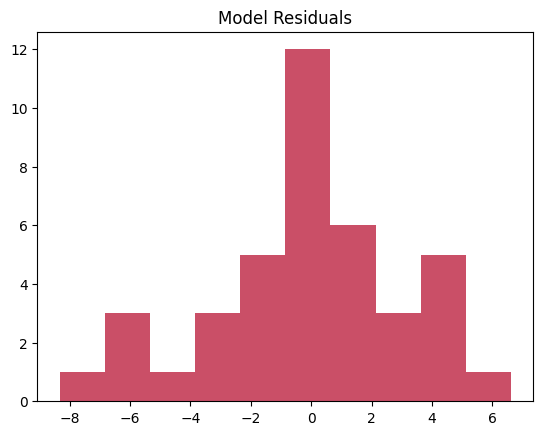

In [56]:
(y_test - model_predictions).hist(grid=False, color='#CA4F67')
plt.title("Model Residuals")
plt.show()

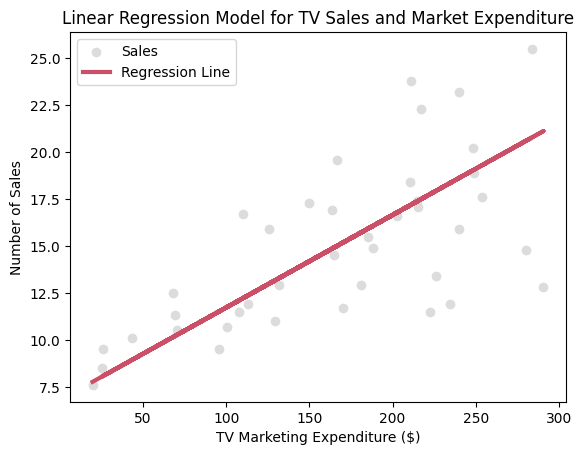

Marketing Expenditure Coefficient: 0.05
Mean Squared Error: 10.86
Root Mean Squared Error: 3.3
R2 Score: 0.42


In [62]:
# outputs
plt.scatter(X_test, y_test, color='gainsboro', label='Sales')
plt.plot(X_test, model_predictions, color='#CA4F67', linewidth=3, linestyle='-', label="Regression Line")
plt.title("Linear Regression Model for TV Sales and Market Expenditure")
plt.legend()
plt.xlabel('TV Marketing Expenditure ($)')
plt.ylabel('Number of Sales')
plt.show()

print(f'Marketing Expenditure Coefficient: {round(regression_model.coef_[0][0], 2)}')
print(f'Mean Squared Error: {round(model_mse, 2)}')
print(f'Root Mean Squared Error: {round(model_rmse, 2)}')
print(f'R2 Score: {round(r2_score(y_test, model_predictions), 2)}')